# Parsing xml to csv to dataframes


In [91]:
import convert_data
import os
import pandas as pd
import numpy as np

In [2]:
convert_data.all_xml(os.getcwd() + '/data/')

health.stackexchange.com
Comments.xml.csv
Votes.xml.csv
Users.xml.csv
PostHistory.xml.csv
Comments.xml
Tags.xml.csv
PostLinks.xml.csv
Users.xml
Votes.xml
Tags.xml
PostHistory.xml
PostLinks.xml
Posts.xml
Posts.xml.csv
gardening.stackexchange.com
Comments.xml.csv
Votes.xml.csv
Users.xml.csv
PostHistory.xml.csv
Badges.xml.csv
Comments.xml
Tags.xml.csv
PostLinks.xml.csv
Users.xml
Votes.xml
Tags.xml
PostHistory.xml
PostLinks.xml
Posts.xml
Posts.xml.csv
Badges.xml
magento.stackexchange.com
Comments.xml.csv
Votes.xml.csv
Users.xml.csv
PostHistory.xml.csv
Badges.xml.csv
Comments.xml
Tags.xml.csv
PostLinks.xml.csv
Users.xml
Votes.xml
Tags.xml
PostHistory.xml
PostLinks.xml
Posts.xml
Posts.xml.csv
Badges.xml
.DS_Store
raspberrypi.stackexchange.com
Comments.xml
Users.xml
Votes.xml
Tags.xml
PostHistory.xml
PostLinks.xml
Posts.xml
Badges.xml
aviation.stackexchange.com
Comments.xml.csv
Votes.xml.csv
Users.xml.csv
PostHistory.xml.csv
Badges.xml.csv
Comments.xml
Tags.xml.csv
PostLinks.xml.csv
Users.xml

In [3]:
rpi_posts = pd.read_csv('data/raspberrypi.stackexchange.com/Posts.xml.csv')
magento_posts = pd.read_csv('data/magento.stackexchange.com/Posts.xml.csv')
gardening_posts = pd.read_csv('data/gardening.stackexchange.com/Posts.xml.csv')
health_posts = pd.read_csv('data/health.stackexchange.com/Posts.xml.csv')
aviation_posts = pd.read_csv('data/aviation.stackexchange.com/Posts.xml.csv')

In [4]:
rpi_comments = pd.read_csv('data/raspberrypi.stackexchange.com/Comments.xml.csv')
magento_comments = pd.read_csv('data/magento.stackexchange.com/Comments.xml.csv')
gardening_comments = pd.read_csv('data/gardening.stackexchange.com/Comments.xml.csv')
health_comments = pd.read_csv('data/health.stackexchange.com/Comments.xml.csv')
aviation_comments = pd.read_csv('data/aviation.stackexchange.com/Comments.xml.csv')

# Trends and seasonality

In [69]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.lines import Line2D
from datetime import datetime

In [124]:
def drawLinePlot(df1, df2, x_axis, y_axis, title_):
    df1['YearMonth'] = pd.DataFrame(pd.to_datetime(df1['CreationDate']).dt.date)
    df1['YearMonth'] = pd.to_datetime(df1.YearMonth)
    df1['YearMonth'] = df1['YearMonth'].dt.strftime('%Y-%m')
    df1 = df1.groupby(['YearMonth']).size().reset_index(name='Number')
    
    df2['YearMonth'] = pd.DataFrame(pd.to_datetime(df2['CreationDate']).dt.date)
    df2['YearMonth'] = pd.to_datetime(df2.YearMonth)
    df2['YearMonth'] = df2['YearMonth'].dt.strftime('%Y-%m')
    df2 = df2.groupby(['YearMonth']).size().reset_index(name='Number')
    
    fig, ax = plt.subplots()
    plot_ = sns.lineplot(x = "YearMonth", y = "Number", data = df1, label='Number of posts')    
    plot_ = sns.lineplot(x = "YearMonth", y = "Number", data = df2, label='Number of comments')    
    ax.set(xlabel=x_axis, ylabel=y_axis)
    plt.title(title_)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 20 == 0:  # every 20th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

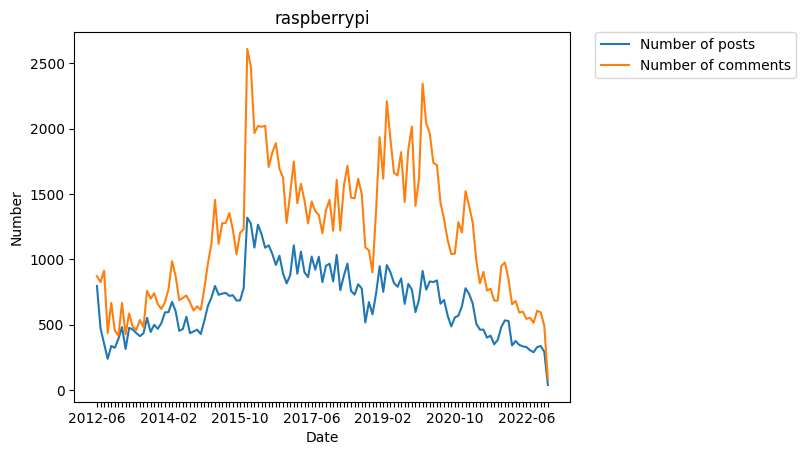

In [125]:
drawLinePlot(rpi_posts, rpi_comments, 'Date', 'Number', 'raspberrypi')

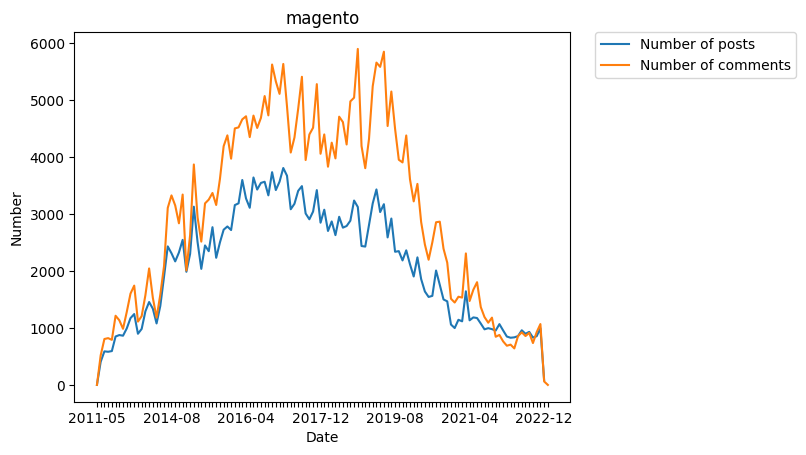

In [126]:
drawLinePlot(magento_posts, magento_comments, 'Date', 'Number', 'magento')

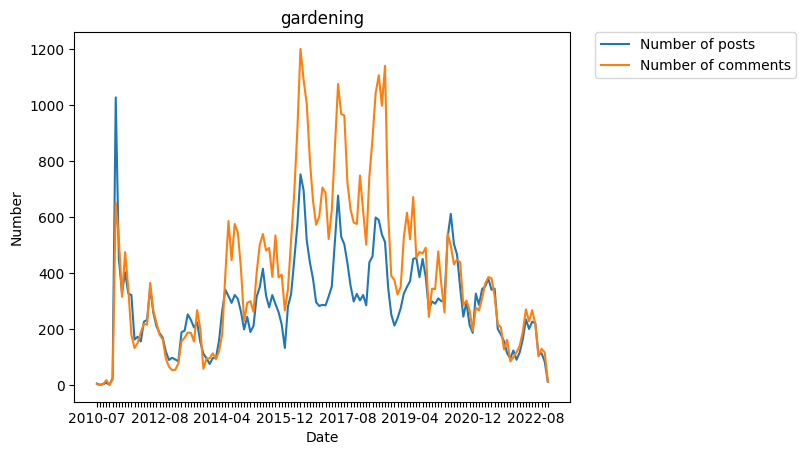

In [127]:
drawLinePlot(gardening_posts, gardening_comments, 'Date', 'Number', 'gardening')

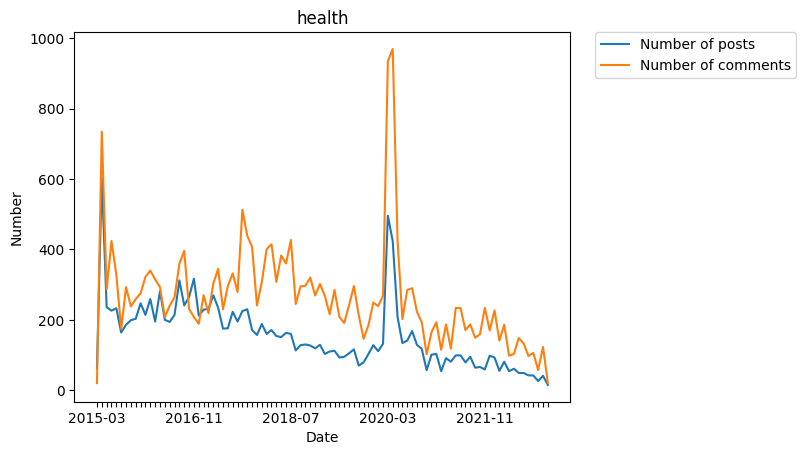

In [128]:
drawLinePlot(health_posts, health_comments, 'Date', 'Number', 'health')

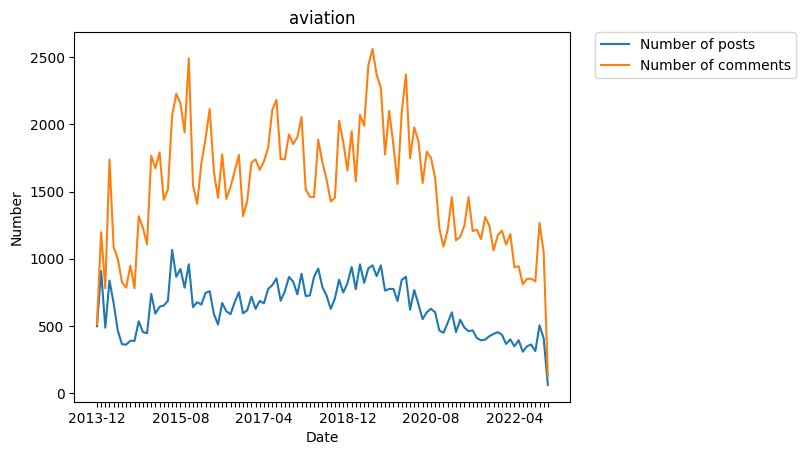

In [129]:
drawLinePlot(aviation_posts, aviation_comments, 'Date', 'Number', 'aviation')